In [1]:
import matplotlib.pyplot as plt
import umap
import numpy as np

In [3]:
from dynadojo.systems.lorenz import LorenzSystem
from dynadojo.systems.kuramoto import KuramotoSystem

In [4]:
# generate trajectories for lorenz, kuramoto
latent_dim = 19
embed_dim = latent_dim
n = 50
test_size = 30
timesteps = 50

systems = [LorenzSystem(latent_dim, embed_dim, noise_scale=0), KuramotoSystem(latent_dim=latent_dim, embed_dim=embed_dim)] 

trajectories = []
for system in systems:
    x0 = system.make_init_conds(30) 
    x = system.make_data(x0, timesteps=timesteps, control=np.zeros((n, timesteps, embed_dim)))
    trajectories.append(x)

In [5]:
def featurize(x):
    return np.mean(x, axis=1)

all_features = []

for traj in trajectories:
    features = featurize(traj)
    all_features.append(features)


all_features = np.concatenate(all_features)

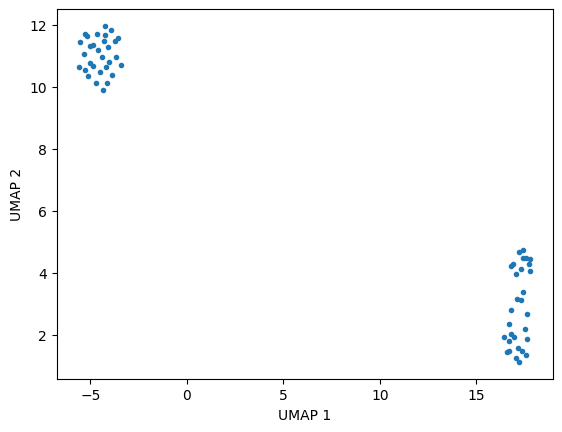

In [7]:
reducer = umap.UMAP(n_components=2)
reduced_features = reducer.fit_transform(all_features)

plt.plot(reduced_features[:, 0], reduced_features[:, 1], '.')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()